In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
train_base = pd.read_csv('csv/train.csv')
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 24 columns):
title                             4651 non-null object
description                       4651 non-null object
plot                              4651 non-null object
csm_review                        4651 non-null object
need_to_know                      4651 non-null object
par_rating                        1988 non-null float64
kids_rating                       2413 non-null float64
csm_rating                        4651 non-null int64
Author                            4376 non-null object
Genre                             4651 non-null object
Topics                            3112 non-null object
Book type                         4651 non-null object
Publisher                         4545 non-null object
Publication date                  4651 non-null object
Publisher's recommended age(s)    3725 non-null object
Number of pages                   4615 non-null float64
Available o

In [3]:
train_base = train_base.dropna(axis='columns')
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 10 columns):
title               4651 non-null object
description         4651 non-null object
plot                4651 non-null object
csm_review          4651 non-null object
need_to_know        4651 non-null object
csm_rating          4651 non-null int64
Genre               4651 non-null object
Book type           4651 non-null object
Publication date    4651 non-null object
Last updated        4651 non-null object
dtypes: int64(1), object(9)
memory usage: 363.5+ KB


In [4]:
mode = int(train_base.loc[:, "csm_rating"].mode())
median = int(train_base.loc[:, "csm_rating"].median())

In [5]:
print("The most common rating is %d." % mode)
print("The median is %d." % median)

The most common rating is 4.
The median is 9.


In [6]:
train_base["csm_mode"] = mode
train_base["csm_median"] = median
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
title               4651 non-null object
description         4651 non-null object
plot                4651 non-null object
csm_review          4651 non-null object
need_to_know        4651 non-null object
csm_rating          4651 non-null int64
Genre               4651 non-null object
Book type           4651 non-null object
Publication date    4651 non-null object
Last updated        4651 non-null object
csm_mode            4651 non-null int64
csm_median          4651 non-null int64
dtypes: int64(3), object(9)
memory usage: 436.2+ KB


In [7]:
y_actual = train_base.loc[:, "csm_rating"]
y_mode = train_base.loc[:, "csm_mode"]
y_median = train_base.loc[:, "csm_median"]

In [8]:
rms_mode = sqrt(mean_squared_error(y_actual, y_mode))
rms_median = sqrt(mean_squared_error(y_actual, y_median))

print("The rms for the mode is %.2f." % rms_mode)
print("The rms for the median is %.2f." % rms_median)

The rms for the mode is 6.46.
The rms for the median is 3.89.


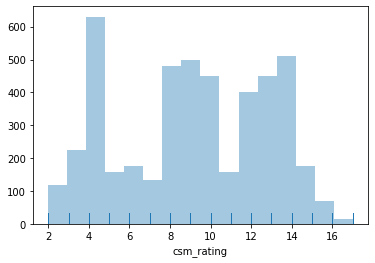

In [9]:
sns.distplot(train_base.loc[:, "csm_rating"], kde=False, bins=16, rug=True);

## Strip the date

In [10]:
#df['col'] = pd.to_datetime(df['col'])
train_base["Publication date"] = train_base["Publication date"].str[-4:]

In [11]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
title               4651 non-null object
description         4651 non-null object
plot                4651 non-null object
csm_review          4651 non-null object
need_to_know        4651 non-null object
csm_rating          4651 non-null int64
Genre               4651 non-null object
Book type           4651 non-null object
Publication date    4651 non-null object
Last updated        4651 non-null object
csm_mode            4651 non-null int64
csm_median          4651 non-null int64
dtypes: int64(3), object(9)
memory usage: 436.2+ KB


## Drop Updated

In [12]:
train_base.drop(columns=["Last updated"], inplace=True)

In [13]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 11 columns):
title               4651 non-null object
description         4651 non-null object
plot                4651 non-null object
csm_review          4651 non-null object
need_to_know        4651 non-null object
csm_rating          4651 non-null int64
Genre               4651 non-null object
Book type           4651 non-null object
Publication date    4651 non-null object
csm_mode            4651 non-null int64
csm_median          4651 non-null int64
dtypes: int64(3), object(8)
memory usage: 399.8+ KB


## Transform Categorical Categories

### [Transform Columns](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/)

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
cat_encoder = OneHotEncoder()

In [16]:
train_genre_cat = train_base[[ "Genre"]]
train_genre_1 = cat_encoder.fit_transform(train_genre_cat)

In [17]:
train_book_type_cat = train_base[["Book type"]]
train_genre_1 = cat_encoder.fit_transform(train_book_type_cat)

In [18]:
train_genre_1

<4651x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4651 stored elements in Compressed Sparse Row format>